

TEAM ID:47176-1660796949

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#from google.colab import drive
#drive.mount('/')

In [5]:
df=pd.read_csv("D:/New folder (2)/CropYieldPredection/Data.csv",error_bad_lines=False)

C:\Users\GOKUL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 246093: expected 7 fields, saw 8\nSkipping line 246094: expected 7 fields, saw 8\nSkipping line 246095: expected 7 fields, saw 8\nSkipping line 246096: expected 7 fields, saw 8\nSkipping line 246097: expected 7 fields, saw 8\nSkipping line 246098: expected 7 fields, saw 8\nSkipping line 246099: expected 7 fields, saw 8\nSkipping line 246100: expected 7 fields, saw 8\nSkipping line 246101: expected 7 fields, saw 8\nSkipping line 246102: expected 7 fields, saw 8\nSkipping line 246103: expected 7 fields, saw 8\nSkipping line 246104: expected 7 fields, saw 8\nSkipping line 246105: expected 7 fields, saw 8\nSkipping line 246106: expected 7 fields

In [6]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [7]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [10]:
df = df[df['Production'] !=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238838 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     238838 non-null  object 
 1   District_Name  238838 non-null  object 
 2   Crop_Year      238838 non-null  int64  
 3   Season         238838 non-null  object 
 4   Crop           238838 non-null  object 
 5   Area           238838 non-null  float64
 6   Production     238838 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.6+ MB


In [11]:
#Dropping Null values in production column
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(238838, 7)
(0, 6)


In [12]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [13]:
test

,State_Name,District_Name,Crop_Year,Season,Crop,Area


In [14]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


DATA VISUALISATION

In [15]:
import plotly.express as px ## Visualization
import plotly.graph_objects as go ## Visualization
import matplotlib.pyplot as plt ## Visualization
import plotly as py ## Visuaization
from plotly import tools ## Visualization

import os
import plotly.subplots

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

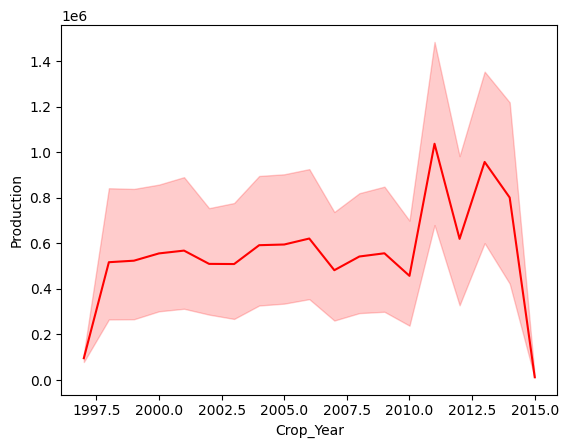

In [16]:
sns.lineplot(x=data["Crop_Year"],y=data["Production"],color='red')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

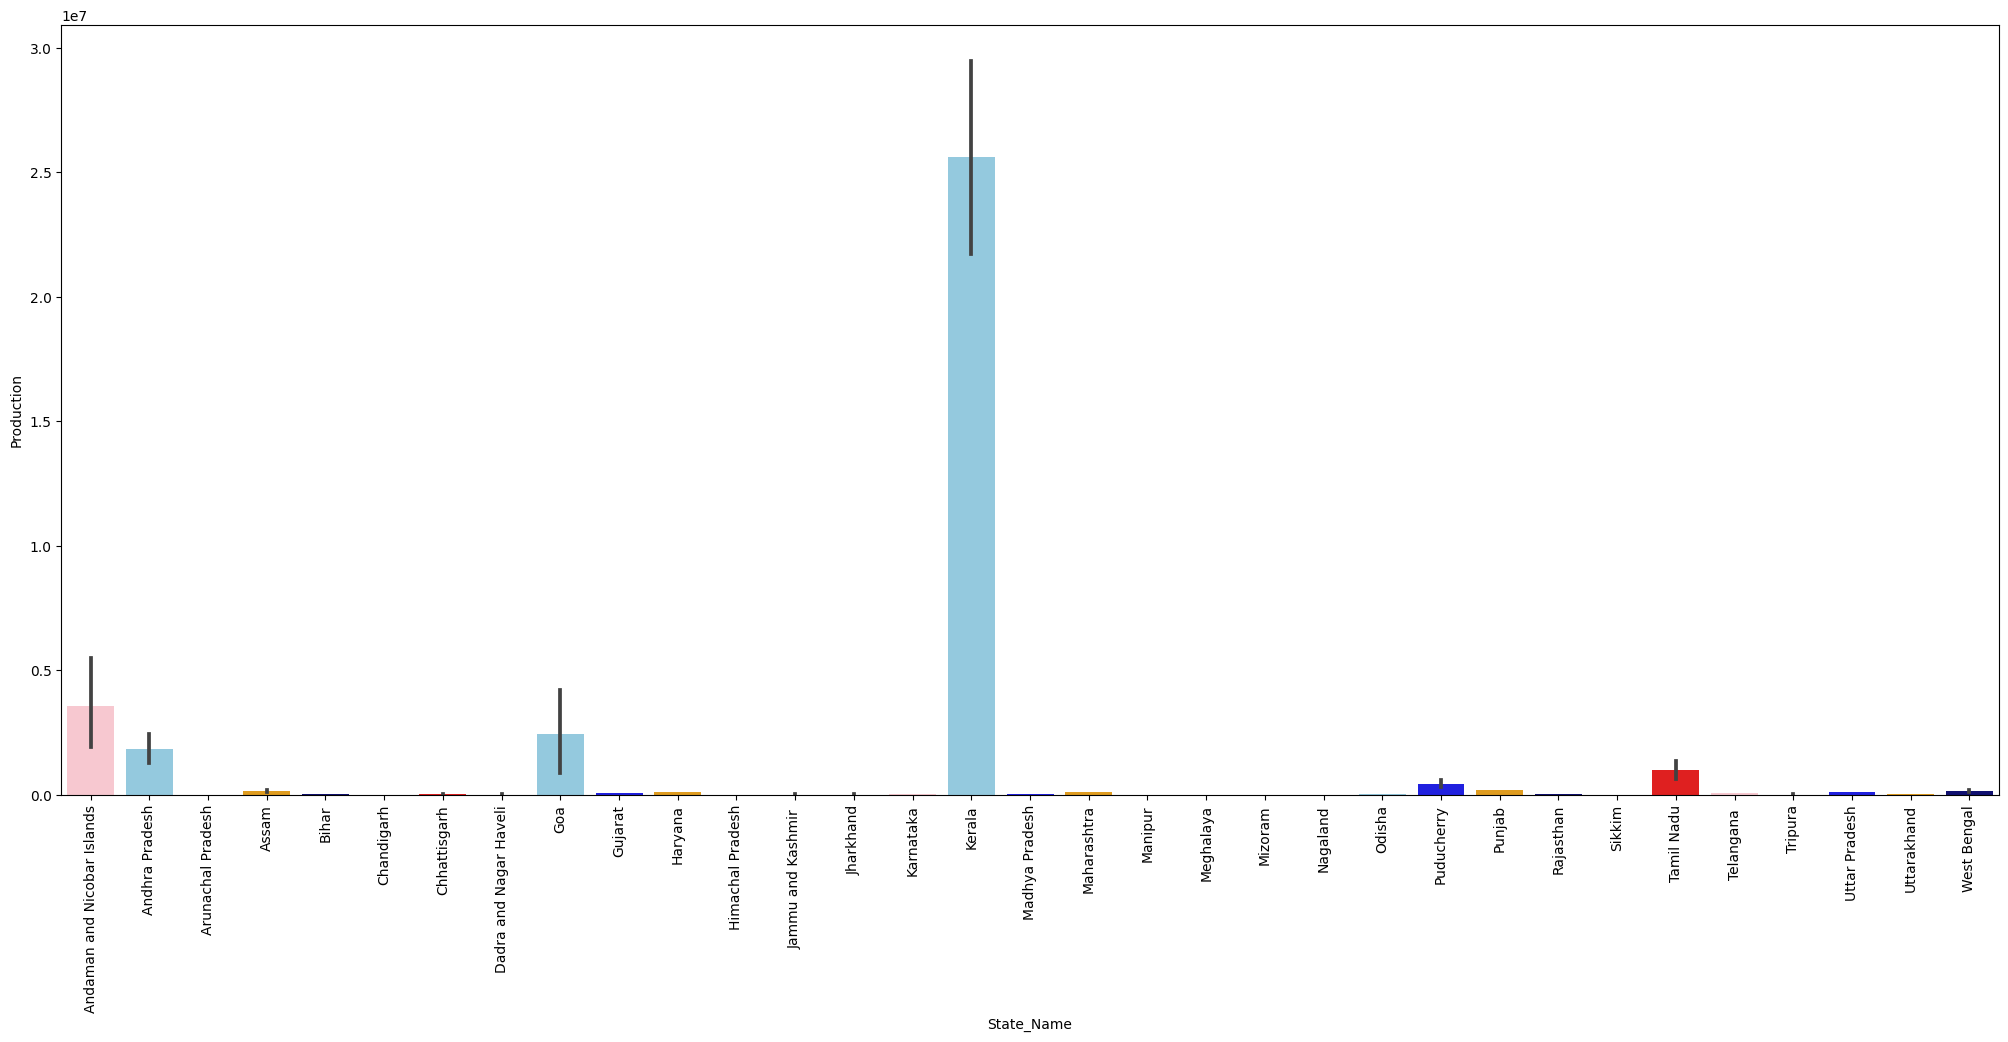

In [17]:
color = ['pink','skyblue','blue','orange','navy','violet','red',]

plt.figure(figsize=(25,10))
sns.barplot(x=data["State_Name"],y=data["Production"],palette=color)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Season', ylabel='Production'>

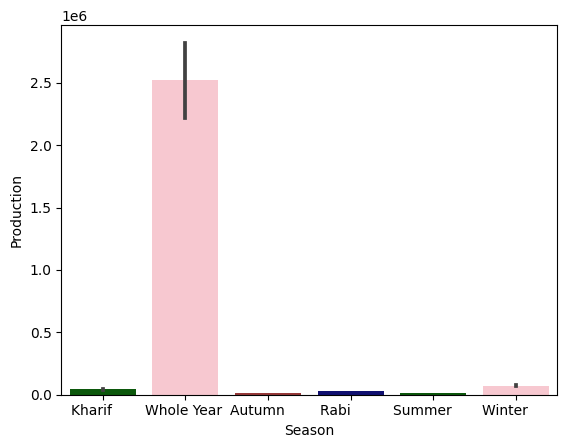

In [18]:
color=['darkgreen','pink','brown','navy']
sns.barplot(x=data["Season"],y=data["Production"],palette=color)

In [19]:
data.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
Autumn,6.441377e+07
Kharif,4.029970e+09
Rabi,2.051688e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


In [20]:
data["Crop"].value_counts()[:5]

Rice                 15078
Maize                13723
Moong(Green Gram)    10037
Urad                  9669
Groundnut             8732
Name: Crop, dtype: int64

In [21]:
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
24,Coconut,1.299816e+11
90,Sugarcane,5.535682e+09
80,Rice,1.605470e+09
102,Wheat,1.332826e+09
74,Potato,4.248263e+08


In [22]:
temp = data.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp, 'State_Name', 'Production')

In [23]:
temp = data.groupby('State_Name')['Area', 'Production'].sum().reset_index()
temp['Production_Per_Unit_Area'] = temp['Production']/temp['Area']
temp = temp.sort_values(by='Production_Per_Unit_Area')
px.bar(temp, 'State_Name', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area', )

C:\Users\GOKUL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



INSIGHTS DERIVED:

Kerala is the most productive state when we compare in terms of production by area.

Andaman and Nicobar islands, Goa, Pondicherry and many other states which are low in overall production, have high productivity when we compare with the crop areas.

In [24]:
#OVERALL PRODUCTION THROUGH YEARS
temp = data.groupby(by='Crop_Year')['Production'].sum().reset_index()
px.line(temp, 'Crop_Year', 'Production')

In [25]:
#AVERAGE PRODUCTION THROUGH YEARS
temp = data.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.scatter(temp, 'Crop_Year', 'Area', color='Area', size='Area')

INSIGHTS DERIVED:

Average Crop Area has decresed over the years.

We had the lowest Average Crop area in Years 2002 and 2003.

In [26]:
#PRODUCTIVITY IN DIFFERENT STATES
temp = data.groupby('State_Name')['Area', 'Production'].sum().reset_index()
temp['Production_Per_Unit_Area'] = temp['Production']/temp['Area']
temp = temp.sort_values(by='Production_Per_Unit_Area')
px.bar(temp, 'State_Name', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area')

C:\Users\GOKUL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [27]:

#MOST AND LEAST PRODUCING CROP DISTRICTS
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(rows=1,cols=2,

                subplot_titles=('Highest crop producing districts', 'Least overall crop producing districts'))

temp = data.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production')
temp1 = temp.tail()
trace1 = go.Bar(x= temp1['District_Name'], y=temp1['Production'])

temp1=temp.head()
trace2 = go.Bar(x= temp1['District_Name'], y=temp1['Production'])

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.show()
del temp,temp1

In [28]:
#MOST PRODUCED CROPS
temp = data.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp.tail(), 'Crop', 'Production')


In [29]:
temp[temp['Production']==0]

,Crop,Production


COCONUT IS THE MOST PRODUCED CROP IN KERALA. EXPLORING A LITTLE BIT MORE ABOUT KERALA

In [30]:
coconut = data[data['Crop']=='Coconut ']

fig = make_subplots(rows=1,cols=2,subplot_titles=('Coconut production in different states', 'Coconut crop area in states'))

temp = coconut.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
trace0 = go.Bar(x=temp['State_Name'], y=temp['Production'])

temp = coconut.groupby(by='State_Name',)['Area'].mean().reset_index().sort_values(by='Area')
trace1 = go.Bar(x=temp['State_Name'], y=temp['Area'])

fig.append_trace(trace0, 1,1)
fig.append_trace(trace1, 1,2)
fig.show()

In [31]:
temp = coconut.groupby(by='Crop_Year')['Production'].sum().reset_index()
px.line(temp, 'Crop_Year', 'Production', title='Coconut production over the years')

In [32]:
#EXPLORING A BIT MORE ABOUT KERALA
kerala = data[data['State_Name']=='Kerala']
temp = kerala.groupby(by='Crop')['Production'].mean().reset_index().sort_values(by='Production')
px.bar(temp, 'Crop', 'Production', title = 'Avg. Crop Production')

In [33]:
#in previous graph as coconut is produced in larger scale, we are just removing it and exploring the crops produced in the remaining  dataset
kerala = kerala[~(kerala['Crop']=='Coconut ')]
temp = kerala.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp, 'Crop', 'Production', title='AVG. Crop Production excluding coconut')




In [34]:
#EDA on the dataset excluding kerala and coconut
data1 = data[~((data['State_Name']=='Kerala') | (data['Crop']=='Coconut '))]

In [35]:
data1

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,5.673764e-07
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,3.279592e-07
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,1.151045e-05
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,4.235129e-04


FEATURE SELECTION


In [36]:
data1 = data.drop(["District_Name","Crop_Year"],axis=1)
f_data = pd.get_dummies(data1)
f_data.head()

,Area,Production,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Tobacco,Crop_Tomato,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1.416670e-06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,7.083351e-10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,2.273756e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,4.540428e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1.168753e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/////////

SPLIT DATA INTO TRAINING AND TESTING SET

In [37]:
X = f_data.drop("Production",axis=1)
y = f_data[["Production"]]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (160021, 146)
X_test : (78817, 146)
y_train : (160021, 1)
y_test : (78817, 1)


MODEL

In [38]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,y_pred)
r2_score(y_test,y_pred)

1.0

MODEL PERFORMANCE METRICS

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1
y_test_classes = np.zeros_like(y_pred)
y_test_classes[y_test > cutoff] = 1
# CONFUSION MATRIX
conf_matrix=confusion_matrix(y_test_classes, y_pred_classes)
conf_matrix

array([[  186,    10],
       [    0, 78621]], dtype=int64)

In [40]:
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)
    
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
    
# calculate the specificity
conf_specificity = (TN / float(TN + FP))
    
# calculate precision
conf_precision = (TN / float(TN + FP))

# calculate recall
recall = recall_score(y_test_classes, y_pred_classes)

# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}') 
print(f'Sensitivity: {round(conf_sensitivity,2)}') 
print(f'Specificity: {round(conf_specificity,2)}') 
print(f'Precision: {round(conf_precision,2)}')
print('Recall: ',recall_score(y_test_classes, y_pred_classes))
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 78621
True Negatives: 186
False Positives: 10
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Sensitivity: 1.0
Specificity: 0.95
Precision: 0.95
Recall:  1.0
f_1 Score: 0.97


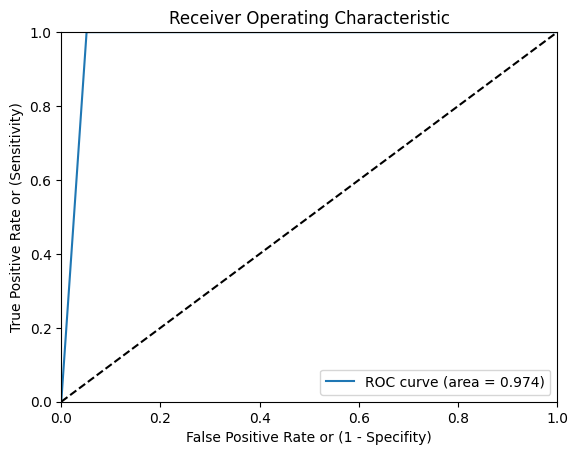

In [41]:

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred_classes)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


Linear: f1=1.000 auc=1.000


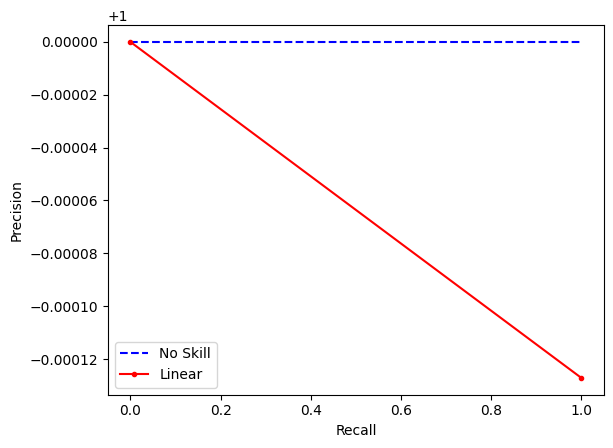

In [42]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

lr_precision, lr_recall, _ = precision_recall_curve(y_test_classes, y_pred_classes)
lr_f1, lr_auc = f1_score(y_test_classes, y_pred_classes), auc(lr_recall, lr_precision)
# summarize scores
print('Linear: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill',color='blue')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Linear',color='red')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()